In [1]:
from google.colab import files
uploaded= files.upload()

Saving Python_SalesData1.csv to Python_SalesData1.csv


In [2]:
import pandas as pd

In [5]:
df= pd.read_csv("Python_SalesData1.csv")

In [6]:
#trim extra spaces from column names and string entries

df.columns = df.columns.str.strip()
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [7]:
print (df.head())

   Order ID        Date             Product  Price  Quantity Purchase Type  \
0     10452  07/11/2022               Fries   3.49    573.07        Online   
1     10453  07/11/2022           Beverages   2.95    745.76        Online   
2     10454  07/11/2022       Sides & Other   4.99    200.40      In-store   
3     10455  08/11/2022             Burgers  12.99    569.67      In-store   
4     10456  08/11/2022  Chicken Sandwiches   9.95    201.01      In-store   

  Payment Method        Manager    City  
0      Gift Card    Tom Jackson  London  
1      Gift Card    Pablo Perez  Madrid  
2      Gift Card     Joao Silva  Lisbon  
3    Credit Card  Walter Muller  Berlin  
4    Credit Card  Walter Muller  Berlin  


In [8]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB
None


In [9]:
print(df.isnull().sum())

Order ID          0
Date              0
Product           0
Price             0
Quantity          0
Purchase Type     0
Payment Method    0
Manager           0
City              0
dtype: int64


In [10]:
df=df.drop_duplicates()

In [11]:
#convert data type
df["Date"] = pd.to_datetime (df["Date"],format="%d/%m/%Y") # Convert to datetime
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")

In [12]:
df[["Price", "Quantity"]].describe()

,Price,Quantity
count,254.000000,254.000000
mean,7.102323,460.611457
std,4.341855,214.888699
min,2.950000,200.400000
25%,3.490000,201.010000
50%,4.990000,538.880000
75%,9.950000,677.440000
max,29.050000,754.430000


In [13]:
df["Total Sales"] = df["Price"] * df["Quantity"]

In [14]:
# Sales by product
sales_by_product = df.groupby("Product")["Total Sales"].sum().reset_index()
print(sales_by_product)

              Product  Total Sales
0           Beverages  103200.2630
1             Burgers  376999.8069
2  Chicken Sandwiches  114641.6950
3               Fries  125674.2903
4       Sides & Other   48999.8040


In [15]:
# Sales by city
sales_by_city = df.groupby("City")["Total Sales"].sum().reset_index()
print(sales_by_city)

     City  Total Sales
0  Berlin  100600.1313
1  Lisbon  241714.1157
2  London  211201.0406
3  Madrid  136200.2665
4   Paris   79800.3051


In [16]:
# Daily sales trend
sales_by_date = df.groupby("Date")["Total Sales"].sum().reset_index()
print(sales_by_date)

         Date  Total Sales
0  2022-11-07    5200.0023
1  2022-11-08   12400.0731
2  2022-11-09   14200.0386
3  2022-11-10   13200.0426
4  2022-11-11   14400.0156
5  2022-11-12   14000.0535
6  2022-11-13   27674.4512
7  2022-11-14   17839.3445
8  2022-11-15   13600.0305
9  2022-11-16   13600.0305
10 2022-11-17   14000.0535
11 2022-11-18   14400.1114
12 2022-11-19   14000.0194
13 2022-11-20    8200.0466
14 2022-11-21   14000.0838
15 2022-11-22   13599.9918
16 2022-11-23   13800.0378
17 2022-11-24   13600.0259
18 2022-11-25   13399.9799
19 2022-11-26   13200.0638
20 2022-11-27   13399.9799
21 2022-11-28   13400.0454
22 2022-11-29   13400.0454
23 2022-11-30   13600.0914
24 2022-12-01   13400.1144
25 2022-12-02   14000.0535
26 2022-12-03   14000.0535
27 2022-12-04    9000.1007
28 2022-12-05   14200.0386
29 2022-12-06   14000.1225
30 2022-12-07   14000.0535
31 2022-12-08   14200.0995
32 2022-12-09   14600.0616
33 2022-12-10   14600.0616
34 2022-12-11   15000.0881
35 2022-12-12   14600.0616
3

In [17]:
# What was the Most Preferred Payment Method?

preferred_payment = df["Payment Method"].value_counts().idxmax()
print("Most Preferred Payment Method:",preferred_payment)

Most Preferred Payment Method: Credit Card


In [18]:
# Which one was the Most Selling Product by Quantity and by Revenue?

top_product_quantity = df.groupby("Product")["Quantity"].sum().idxmax()
top_product_revenue = df.groupby("Product")["Total Sales"].sum().idxmax()

print("Most Selling Product by Quantity:", top_product_quantity)
print("Most Selling Product by Revenue:", top_product_revenue)

Most Selling Product by Quantity: Beverages
Most Selling Product by Revenue: Burgers


In [19]:
# Which City had maximum revenue, and Which Manager earned maximum revenue?

city_max_revenue = df.groupby("City")["Total Sales"].sum().idxmax()
manager_max_revenue = df.groupby("Manager")["Total Sales"].sum().idxmax()

print("City with Maximum Revenue:", city_max_revenue)
print("Manager with Maximum Revenue:", manager_max_revenue)

City with Maximum Revenue: Lisbon
Manager with Maximum Revenue: Joao Silva


In [20]:
# What was the Average Revenue?

average_revenue = df["Total Sales"].mean()
print("Average Revenue:", average_revenue)

Average Revenue: 3029.589996850394


In [21]:
# What was the Average Revenue of November & December?
# Extract month
df["Month"] = df["Date"].dt.month

avg_revenue_nov_dec = df[df["Month"].isin([11,12])]["Total Sales"].mean()
print("Average Revenue in Nov & Dec:", avg_revenue_nov_dec)

Average Revenue in Nov & Dec: 3029.589996850394


In [22]:
# What was the Standard Deviation of Revenue and Quantity?

std_revenue = df["Total Sales"].std()
std_quantity = df["Quantity"].std()

print("Std Dev of Revenue:", std_revenue)
print("Std Dev of Quantity:",std_quantity)

Std Dev of Revenue: 2420.11837804107
Std Dev of Quantity: 214.88869921528863


In [23]:
# What was the Variance of Revenue and Quantity?

var_revenue = df["Total Sales"].var()
var_quantity = df["Quantity"].var()

print("Variance of Revenue:", var_revenue)
print("Variance of Quantity:",var_quantity)

Variance of Revenue: 5856972.963732139
Variance of Quantity: 46177.15305043879


In [24]:
# Was the revenue increasing or decreasing over the time?

revenue_trend = df.groupby("Date")["Total Sales"].sum().reset_index()

# Check increasing or decreasing by comparing first vs last
if revenue_trend["Total Sales"].iloc[-1] > revenue_trend["Total Sales"].iloc[0]:
    print("Revenue is Increasing over time")
else:
    print("Revenue is Decreasing over time")

Revenue is Increasing over time


In [25]:
# What was the Average 'Quantity Sold' & 'Average Revenue' for each product?

avg_product_stats = df.groupby("Product").agg(
    Avg_Quantity=("Quantity", "mean"),
    Avg_Revenue=("Total Sales", "mean")
).reset_index()

print(avg_product_stats)

              Product  Avg_Quantity  Avg_Revenue
0           Beverages    699.662800  2064.005260
1             Burgers    558.121346  7249.996287
2  Chicken Sandwiches    214.152308  2204.647981
3               Fries    628.124314  2464.201771
4       Sides & Other    200.400000   999.996000


In [26]:
# What was the total number of orders or sales made?

total_orders = df["Order ID"].nunique()
print("Total Number of Orders:",total_orders)

Total Number of Orders: 254


In [27]:
import matplotlib.pyplot as plt

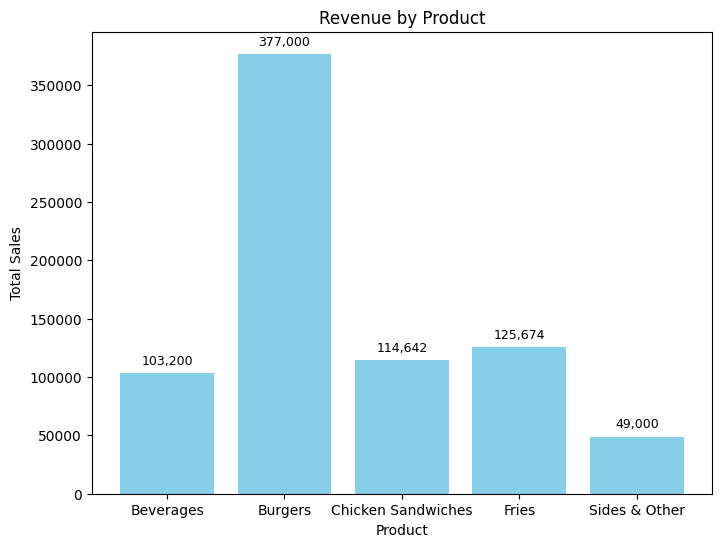

In [28]:
# Revenue by Product
sales_by_product = df.groupby("Product")["Total Sales"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.bar(sales_by_product["Product"], sales_by_product["Total Sales"], color="skyblue")
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")

# Add labels on top of bars
for i, v in enumerate(sales_by_product["Total Sales"]):
    plt.text(i, v + 0.02 * max(sales_by_product["Total Sales"]), f"{v:,.0f}",
            ha="center", fontsize=9)
plt.show()


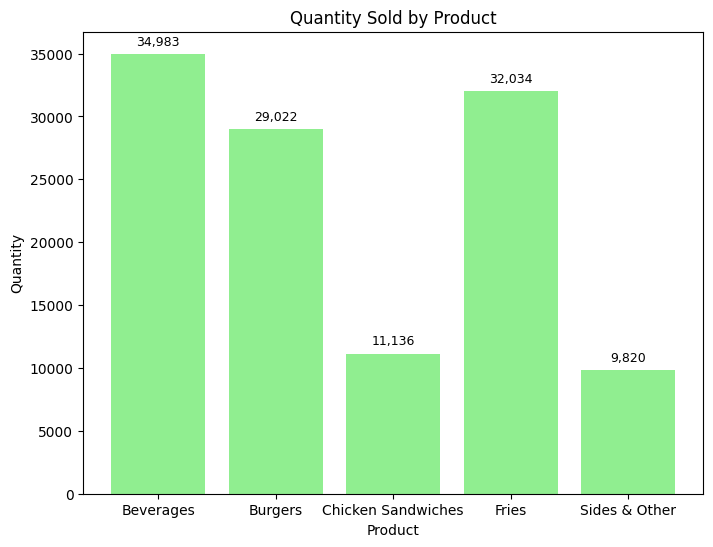

In [29]:
# Quantity by Product
quantity_by_product = df.groupby("Product")["Quantity"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.bar(quantity_by_product["Product"], quantity_by_product["Quantity"], color="lightgreen")
plt.title("Quantity Sold by Product")
plt.xlabel("Product")
plt.ylabel("Quantity")

# Add labels on top of bars
for i, v in enumerate(quantity_by_product["Quantity"]):
    plt.text(i, v + 0.02 * max(quantity_by_product["Quantity"]), f"{v:,.0f}",
             ha="center", fontsize=9)
plt.show()


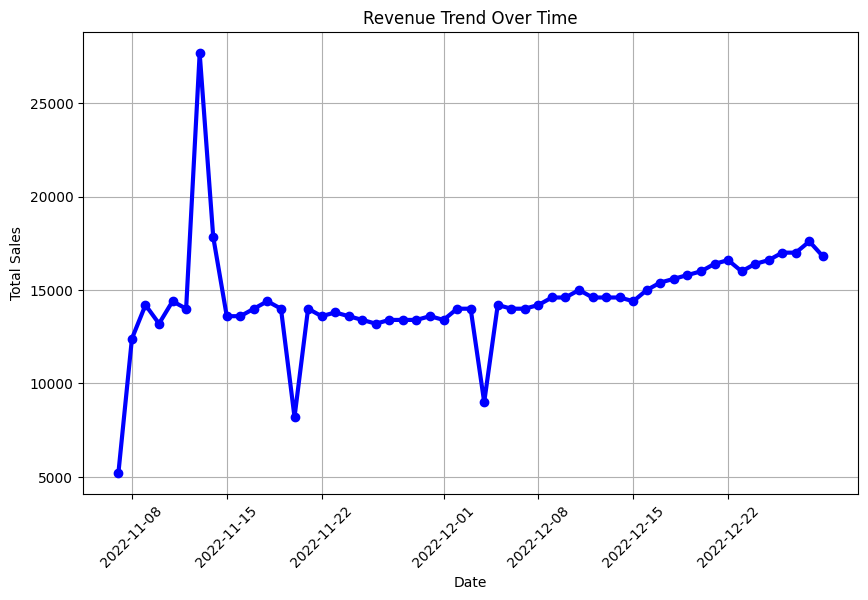

In [30]:
## Revenue trend over time

# Group by Date for revenue trend
revenue_trend = df.groupby("Date")["Total Sales"].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(revenue_trend["Date"], revenue_trend["Total Sales"], marker="o", linewidth=3, color="blue")
plt.title("Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)  # optional grid

# Rotate x-axis labels if dates are crowded
plt.xticks(rotation=45)

plt.show()

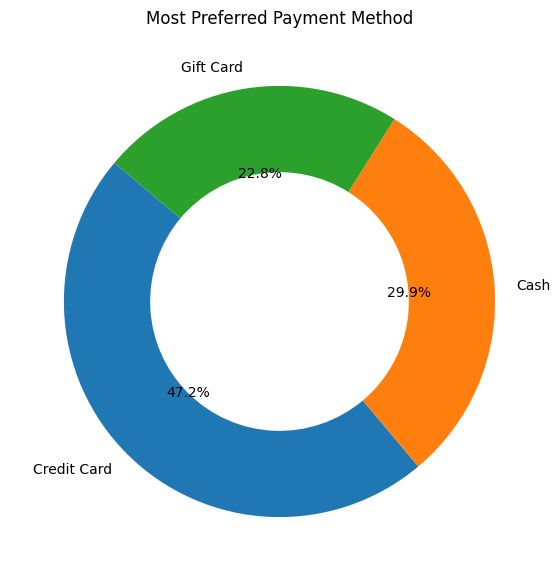

In [31]:
## Payment distribution

# Count payment methods
payment_counts = df["Payment Method"].value_counts().reset_index()
payment_counts.columns = ["Payment Method", "Count"]

plt.figure(figsize=(7,7))
plt.pie(payment_counts["Count"],
        labels=payment_counts["Payment Method"],
        autopct="%1.1f%%",      # show percentages
        startangle=140,         # rotate start angle
        wedgeprops={"width":0.4})  # donut effect (width < 1 makes a hole)

plt.title("Most Preferred Payment Method")
plt.show()


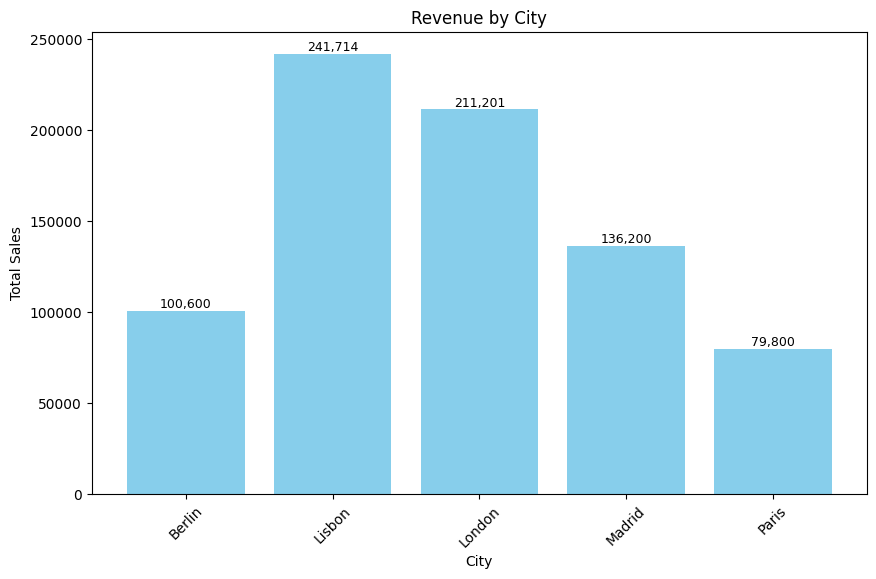

In [32]:
## Revenue by city

# Group by City
city_sales = df.groupby("City")["Total Sales"].sum().reset_index()

plt.figure(figsize=(10,6))
bars = plt.bar(city_sales["City"], city_sales["Total Sales"], color="skyblue")
plt.title("Revenue by City")
plt.xlabel("City")
plt.ylabel("Total Sales")

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:,.0f}", ha="center", va="bottom", fontsize=9)
plt.xticks(rotation=45)  # rotate city names if long
plt.show()

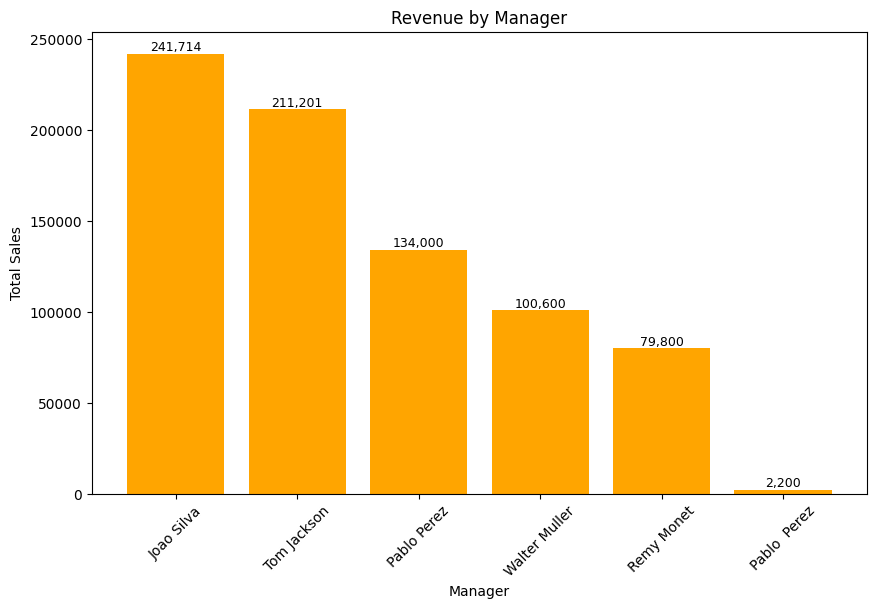

In [33]:
## Revenue by manager

# Group by Manager and sum sales
manager_sales = df.groupby("Manager")["Total Sales"].sum().reset_index()

# Sort by Total Sales descending (like categoryorder in Plotly)
manager_sales = manager_sales.sort_values("Total Sales", ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(manager_sales["Manager"], manager_sales["Total Sales"], color="orange")
plt.title("Revenue by Manager")
plt.xlabel("Manager")
plt.ylabel("Total Sales")

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f"{height:,.0f}", ha="center", va="bottom", fontsize=9)

plt.xticks(rotation=45)  # rotate if manager names are long
plt.show()

